## Scrape public domain images

In [ ]:
from bs4 import BeautifulSoup
import requests
import urllib
import os
import io

In [ ]:
def save_vector_images(n):
    url = 'https://publicdomainvectors.org'
    soup = BeautifulSoup(requests.get(url).content,'html')
    wrapper = soup.find('div', {'id': 'vectors'})
    img = wrapper.findAll('img')
    img_src = [i['src'] for i in img]
    for i in img_src[:n]:            
        req = urllib.request.Request(url+i, headers={'User-Agent' : "Magic Browser"}) 
        con = urllib.request.urlopen(req)
        print(con.read())
#         f = open(req, 'rb')
#         img = Image.open(f)
#             s = url.read()
#         img = Image.open(con.read())

#         img_file = io.BYtesIO(path_img.read())
#         img = Image.open(img_file)
#         img.save('nonogram/img/img_src')
save_vector_images(2)

In [ ]:
def save_public_images(n):
    url = 'https://publicdomainvectors.org'
    soup = BeautifulSoup(requests.get(url).content,'html')
    wrapper = soup.find('div', {'id': 'vectors'})
    img = wrapper.findAll('img')
    img_src = [i['src'] for i in img]
    for i in img_src[:n]:
        try:
            f = urllib.request.urlopen(url+i)
        except urllib.request.HTTPError as e:
#             print (e.fp.read())
            
#         req = urllib.request.Request(url+i, headers={'User-Agent' : "Magic Browser"}) 
#         con = urllib.request.urlopen(req)
# #         print(con.read())
# #         f = open(req, 'rb')
# #         img = Image.open(f)
# #             s = url.read()
#         img = Image.open(con.read())

# #         img_file = io.BYtesIO(path_img.read())
# #         img = Image.open(img_file)
# #         img.save('nonogram/img/img_src')
save_vector_images(2)

## Pixelize and transform image

In [1]:
from PIL import Image, ImageEnhance
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
#Crop image (and remove banner)

def remove_blank_col(image):
    empty_col = []
    for i in range(image.shape[1]):
        col = image[:,i].tolist()
        if col[1:] == col[:-1]:
            empty_col.append(i)
    image = np.delete(image, empty_col, axis=1)
    return image

def remove_blank_rows(image):
    empty_row = []
    for i in range(image.shape[0]):
        row = image[i,:].tolist()
        if row[1:] == row[:-1]:
            empty_row.append(i)
    image = np.delete(image, empty_row, axis=0)
    return image

def crop_image(img, banner=True):
    w, h = img.size
    if banner:
        img = img.crop((0, 0, w, h-50))
    img_arr = np.asarray(img)
    crop_v = remove_blank_rows(img_arr)
    crop_h = remove_blank_col(crop_v)
    return crop_h

In [73]:
#Resize and adjust colors

def pixelize(n, img, new_img):
    nw, nh = new_img.size
    new_width =  int(nw * n / nh)
    image = img.resize((new_width, n),resample=Image.BILINEAR)
#     return image.resize(new_img.size, Image.NEAREST)
    return image

def remove_light_colors(image_arr, n):
    high_value_filter = image_arr > n
    image_arr[high_value_filter] = 255
    return Image.fromarray(image_arr)

def simplify_colors(image, n):
    image = image.convert('P', palette=Image.ADAPTIVE, colors=n)
    return image.convert("RGB", palette=Image.ADAPTIVE, colors=n)

def increase_sharpness(image, n):
    sharpness = ImageEnhance.Sharpness(image)
    return sharpness.enhance(n)

def increase_contrast(image, n):
    contrast = ImageEnhance.Contrast(image)
    return contrast.enhance(n)

def save_img(image):
    image.save('nonogram/pixel_img/' + source_file)

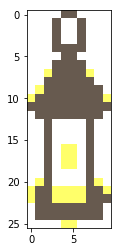

In [114]:
source_file = 'lantern-clipart-publicdomain.jpg'
# spotted-shag.jpg
# bell-boy-publicdomainvector.jpg
# lantern-clipart-publicdomain.jpg
# https://www.oldbookillustrations.com

image = Image.open('nonogram/img/' + source_file)
cropped_img = Image.fromarray(crop_image(image), 'RGB')
new_img = pixelize(30, image, cropped_img)
new_img_arr = np.array(new_img).copy()
# new_img = increase_contrast(new_img, 1)
new_img = increase_sharpness(new_img, 1.5)
new_img = remove_light_colors(np.array(new_img), 130)
new_img = Image.fromarray(crop_image(new_img, banner=False))
new_img = simplify_colors(new_img, 3)
plt.imshow(new_img)
save_img(new_img)

## Create nonogram grid

In [152]:
img_arr = np.array(new_img)
print(img_arr.shape)
img_2d = img_arr.reshape(img_arr.shape[1],-1)
print(img_2d)
unique_2d = np.unique(img_arr, axis=0, return_counts=True)
# np.unique(unique_2d, axis=2)
# img_arr
unique_2d

(26, 10, 3)
[[255 255 255 255 255 255 255 255 255 255 255 255 103  90  79 103  90  79
  255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 103  90  79 255 255 255 255 255 255 103  90  79 255 255 255
  255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 103  90  79
  255 255 255 255 255 255]
 [103  90  79 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 103  90  79 255 255 255 255 255 255 103  90  79 255 255 255
  255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 103  90  79
  103  90  79 103  90  79 103  90  79 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255]
 [255 255 255 255 255 255 103  90  79 103  90  79 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 103  90  79
  103  90  79 103  90  79 103  90  79 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 106 103  90  79 103  90  79 103  90  79
  103  90  79 255 255 106]
 [255 255 255 255 2

(array([[[103,  90,  79],
         [103,  90,  79],
         [103,  90,  79],
         [103,  90,  79],
         [103,  90,  79],
         [103,  90,  79],
         [103,  90,  79],
         [103,  90,  79],
         [103,  90,  79],
         [103,  90,  79]],
 
        [[255, 255, 106],
         [103,  90,  79],
         [103,  90,  79],
         [103,  90,  79],
         [103,  90,  79],
         [103,  90,  79],
         [103,  90,  79],
         [103,  90,  79],
         [103,  90,  79],
         [255, 255, 106]],
 
        [[255, 255, 106],
         [103,  90,  79],
         [103,  90,  79],
         [255, 255, 106],
         [255, 255, 106],
         [255, 255, 106],
         [255, 255, 106],
         [103,  90,  79],
         [103,  90,  79],
         [103,  90,  79]],
 
        [[255, 255, 106],
         [103,  90,  79],
         [103,  90,  79],
         [255, 255, 106],
         [255, 255, 106],
         [255, 255, 106],
         [255, 255, 106],
         [103,  90,  79],
   

In [175]:
from bs4 import BeautifulSoup
tsla_tr = BeautifulSoup("<tr><td align=\"right\" style=\"white-space:nowrap\" width=\"130\">Sep-21-18 09:56PM  </td><td align=\"left\"><a class=\"tab-link-news\" href=\"https://finance.yahoo.com/video/billionaire-investor-questions-elon-musk-015608758.html\" target=\"_blank\">Billionaire investor questions Elon Musk getting 'a pass' after bombshell tweets</a> <span style=\"color:#aa6dc0;font-size:9px\">Fox Business Videos</span></td></tr>")

In [176]:
tsla_tr.find('a')

<a class="tab-link-news" href="https://finance.yahoo.com/video/billionaire-investor-questions-elon-musk-015608758.html" target="_blank">Billionaire investor questions Elon Musk getting 'a pass' after bombshell tweets</a>

In [178]:
for i, table_row in enumerate(tsla_tr):
    link_text = table_row.find('a')
    data_text = table_row.find("td")
    print(f'{i}:')
    print(link_text)
    print(data_text)
    if i == 3:
        break

0:
<a class="tab-link-news" href="https://finance.yahoo.com/video/billionaire-investor-questions-elon-musk-015608758.html" target="_blank">Billionaire investor questions Elon Musk getting 'a pass' after bombshell tweets</a>
<td align="right" style="white-space:nowrap" width="130">Sep-21-18 09:56PM  </td>
